In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
black, white, blue, red = (0.0,0.0,0.0), (1.0,1.0,1.0), (0.0,1.0,1.0), (1.0,0.0,0.0)


In [3]:
# Define ChessBoard class and initialize board

import matplotlib.pyplot as plt
import numpy as np


class ChessBoard:

    def __init__(self):
        # initialize checkered board
        grid = np.ones((8,8,3))
        for i in range(8):
            for j in range(8):
                if (i % 2 != 0 and j % 2 == 0) or (i % 2 == 0 and j % 2 != 0):
                    grid[i][j] = black
        self.grid = grid
    
    def render(self):
        plt.imshow(self.grid)
    
    def add_red(self, row, col):
        self.grid[row][col] = red
    
    def add_blue(self, row, col):
        self.grid[row][col] = blue
    
    def is_under_attack(self):
        for i in range(8):
            for j in range(8):
                if tuple(self.grid[i][j]) == blue and self.attacker_in_position(i,j):
                    return True
        return False
    
    def attacker_in_position(self, row, col):
        return self.attacker_in_row(row) or self.attacker_in_column(col) or self.attacker_in_diagonal(row,col)
    
    def attacker_in_row(self, row):
        for rgb in self.grid[row]:
            if tuple(rgb) == red:
                return True
        return False
    
    def attacker_in_column(self, column):
        col = [row[column] for row in self.grid]
        for rgb in col:
            if tuple(rgb) == red:
                return True
        return False 
    
    def attacker_in_diagonal(self, row, col):
        N = len(self.grid)
        for i in range(N):
            # diagonal column
            diag_col = i + col - row
            
            #reverse diagonal column
            rev_diag_col =  row + col - i
              
            if diag_col > 0 and diag_col < N and tuple(self.grid[i][diag_col]) == red:
                return True
            elif rev_diag_col > 0 and rev_diag_col < N and tuple(self.grid[i][rev_diag_col]) == red:
                return True
        return False
    

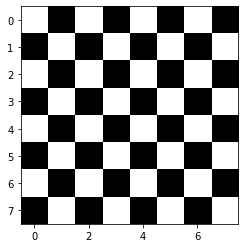

In [4]:
# Shows initial board

board = ChessBoard()
board.render()

# Scenario 1 - Horizontal Attack #

Our blue piece is under attack


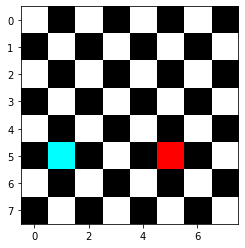

In [5]:
board = ChessBoard()
board.add_red(5,5)
board.add_blue(5,1)
if board.is_under_attack():
    print('Our blue piece is under attack')
else:
    print('Our blue piece is safe')
board.render()


# Scenario 2 - Vertical Attack #


Our blue piece is under attack


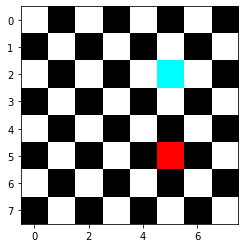

In [6]:
board = ChessBoard()
board.add_red(5,5)
board.add_blue(2,5)
if board.is_under_attack():
    print('Our blue piece is under attack')
else:
    print('Our blue piece is safe')
board.render()


# Scenario 3 - Diagonal Attack

Our blue piece is under attack


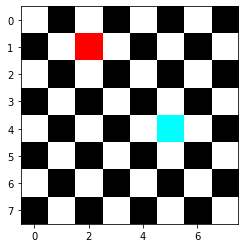

In [7]:
board = ChessBoard()
board.add_red(1,2)
board.add_blue(4,5)
if board.is_under_attack():
    print('Our blue piece is under attack')
else:
    print('Our blue piece is safe')
board.render()

# Scenario 4 - Not Under Attack #

Our blue piece is safe


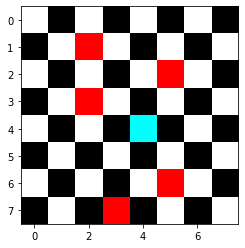

In [8]:
board = ChessBoard()
board.add_red(1,2)
board.add_red(7,3)
board.add_red(6,5)
board.add_red(2,5)
board.add_red(3,2)
board.add_blue(4,4)
if board.is_under_attack():
    print('Our blue piece is under attack')
else:
    print('Our blue piece is safe')
board.render()